# Exercise 7
Compare the effectiveness of two teaching methods, A and B, in helping students pass a test. Analyse the proportions of passing students, calculate confidence intervals for the difference in proportions, conduct significance tests, and evaluate the area under the ROC curve for predictive accuracy.

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder  

In [127]:
df = pd.read_csv("teaching_methods.csv")
df.head()

,Method,Outcome,Study Time
0,A,Pass,10
1,B,Pass,12
2,A,Pass,8
3,A,Pass,6
4,A,Pass,9


In [128]:
encoder = LabelEncoder()

In [129]:
df["Method"] = encoder.fit_transform(df["Method"])
df["Outcome"] = encoder.fit_transform(df["Outcome"])

df.head()

,Method,Outcome,Study Time
0,0,1,10
1,1,1,12
2,0,1,8
3,0,1,6
4,0,1,9


In [130]:
X = df[["Method", "Study Time"]]
Y = df["Outcome"]

In [131]:
n_A = len(df[df["Method"] == 0])
n_B = len(df[df["Method"] == 1])

x_A = len(df[(df["Method"] == 0) & (df["Outcome"] == 1)])
x_B = len(df[(df["Method"] == 1) & (df["Outcome"] == 1)])

p_A = x_A / n_A
p_B = x_B / n_B

print(f"Sample size of students taught by Method A: {n_A}")
print(f"Sample size of students taught by Method B: {n_B}")

print(f"Number of passing students taught by Method A: {x_A}")
print(f"Number of passing students taught by Method B: {x_B}")

print(f"Student Pass Rate with Method A: {p_A}")
print(f"Student Pass Rate with Method B: {p_B}")

Sample size of students taught by Method A: 54
Sample size of students taught by Method B: 46
Number of passing students taught by Method A: 21
Number of passing students taught by Method B: 26
Student Pass Rate with Method A: 0.3888888888888889
Student Pass Rate with Method B: 0.5652173913043478


Text(0.5, 1.0, 'Pass Rate for Methods A and B')

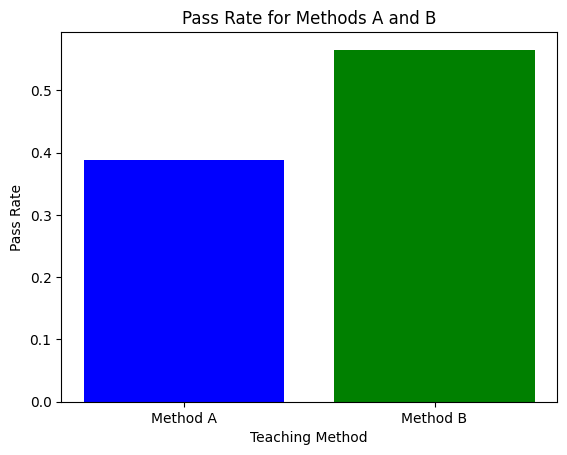

In [132]:
methods = ['Method A', 'Method B']
pass_rates = [p_A, p_B]

plt.bar(methods, pass_rates, color=['blue', 'green'])
plt.xlabel('Teaching Method')
plt.ylabel('Pass Rate')
plt.title('Pass Rate for Methods A and B')

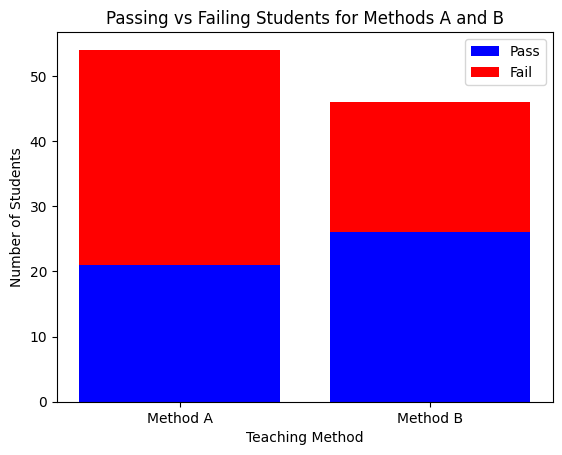

In [133]:
pass_fail_counts_A = [x_A, n_A - x_A]
pass_fail_counts_B = [x_B, n_B - x_B]

plt.bar(methods[0], pass_fail_counts_A[0], label='Pass', color='blue')
plt.bar(methods[0], pass_fail_counts_A[1], bottom=pass_fail_counts_A[0], label='Fail', color='red')

plt.bar(methods[1], pass_fail_counts_B[0], color='blue')
plt.bar(methods[1], pass_fail_counts_B[1], bottom=pass_fail_counts_B[0], color='red')

plt.xlabel('Teaching Method')
plt.ylabel('Number of Students')
plt.title('Passing vs Failing Students for Methods A and B')

plt.legend()

In [134]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep

ci_low, ci_high = confint_proportions_2indep(x_A, n_A, x_B, n_B)

print(f"The Confidence Interval for difference in proportions is [{ci_low}, {ci_high}]")

The Confidence Interval for difference in proportions is [-0.35420954540253474, 0.0189285411289222]


In [135]:
successes = [x_A, x_B]
n_obs = [n_A, n_B]

z_statistic, p_value = proportions_ztest(successes, n_obs)

print(f"z-statistic: {z_statistic}")

if p_value < 0.05:
    print("The proportions are significantly different.")
else:
    print("The proportions are not significantly different.")

z-statistic: -1.7608057630771965
The proportions are not significantly different.


In [136]:
X = df[["Method", "Study Time"]]
Y = df["Outcome"]

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [138]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [139]:
Y_prob = model.predict_proba(X_test)[:, 1] 

Y_pred = model.predict(X_test)

In [140]:
auc = roc_auc_score(Y_test, Y_prob)

print(f"AUC: {auc:.2f}")

AUC: 1.00


In [141]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

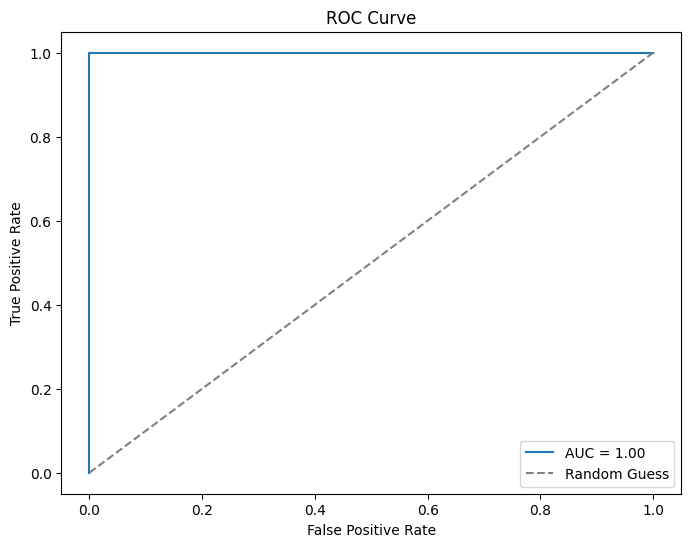

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")